<a href="https://colab.research.google.com/github/henisnpatel/AI-Omega-Project/blob/main/Omega_Project_AI_Cancer_Detection_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload Breast_Cancer.csv dataset
from google.colab import files
dataset = files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


In [ ]:
df = pd.read_csv('Breast_Cancer.csv')

Cleaning dataset

In [ ]:
# missing values
print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


No missing/null values

In [ ]:
# Convert columns with categorical values to numerical values

# Status
df["Status"] = df["Status"].replace({"Alive":1, "Dead":2})

# Progesterone Status
df["Progesterone Status"] = df["Progesterone Status"].replace({"Positive":1, "Negative":2})

# Estrogen Status
df["Estrogen Status"] = df["Estrogen Status"].replace({"Positive":1, "Negative":2})

# A Stage
df["A Stage"] = df["A Stage"].replace({"Localized":1, "Regional":2, "Distant":3})

# Grade
df["Grade"] = df["Grade"].replace(" anaplastic; Grade IV", 4)
df["Grade"] = pd.to_numeric(df["Grade"])

# Marital status
df["Marital Status"] = df["Marital Status"].replace({"Married":1, "Divorced":2, "Widowed":3, "Single ":4, "Separated":5})

# Differentiate
df["differentiate"] = df["differentiate"].replace({"Well differentiated":1, "Moderately differentiated":2, "Poorly differentiated":3, "Undifferentiated":4})

# Race
df["Race"] = df["Race"].replace({"White":1, "Black":2, "Other":3})

# T Stage
df["T Stage "] = df["T Stage "].replace({"T1":1, "T2":2, "T3":3, "T4":4})

# N Stage
df["N Stage"] = df["N Stage"].replace({"N0":1, "N1":2, "N2":3, "N3":4})

# 6th Stage
df["6th Stage"] = df["6th Stage"].replace({"I":1, "IIA":2, "IIB":2, "IIIA":3, "IIIB":3, "IIIC":3})

pd.set_option('future.no_silent_downcasting', True)

# see info
df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

<ipython-input-10-402fc0340471>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace({"Alive":1, "Dead":2})
<ipython-input-10-402fc0340471>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Progesterone Status"] = df["Progesterone Status"].replace({"Positive":1, "Negative":2})
<ipython-input-10-402fc0340471>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,2,2,3,3,2,4,1,1,24,1,60,1
1,50,1,1,2,3,3,2,2,2,35,1,1,14,5,62,1
2,58,1,2,3,4,3,2,2,2,63,1,1,14,7,75,1
3,58,1,1,1,2,2,3,3,2,18,1,1,2,1,84,1
4,47,1,1,2,2,2,3,3,2,41,1,1,3,1,50,1


Converted categorical to numerical data

In [ ]:
# Download cleaned dataset
df.to_csv("cleaned_breast_cancer_data.csv", index=False)
files.download("cleaned_breast_cancer_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data analysis queries below

1. Analyze survival months and survival status (last 2 columns)

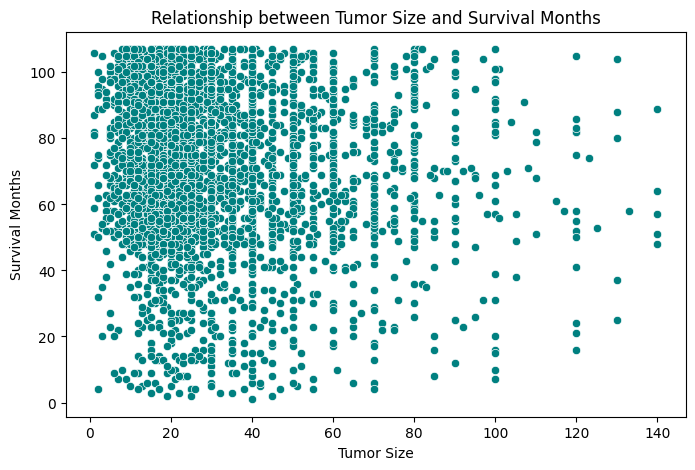

In [ ]:
# Relationship between tumour size and survival months
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Tumor Size"], y=df["Survival Months"], color="teal")

plt.xlabel("Tumor Size")
plt.ylabel("Survival Months")
plt.title("Relationship between Tumor Size and Survival Months")
plt.show()

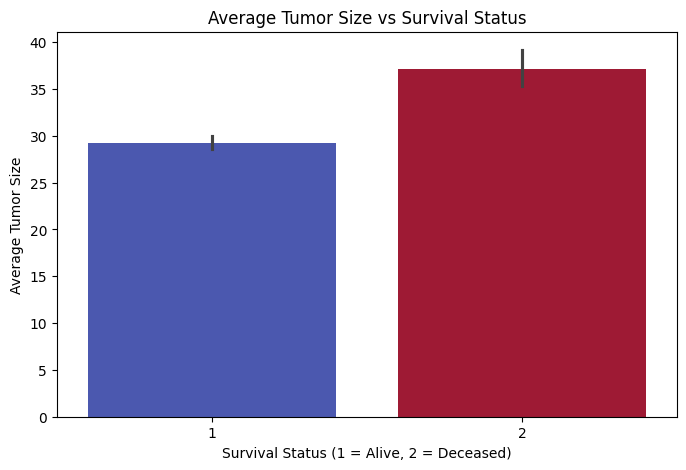

In [ ]:
# Relationship between tumour size and survival status
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Status"], y=df["Tumor Size"], palette="coolwarm", hue=df["Status"], legend=False)

plt.xlabel("Survival Status (1 = Alive, 2 = Deceased)")
plt.ylabel("Average Tumor Size")
plt.title("Average Tumor Size vs Survival Status")
plt.show()

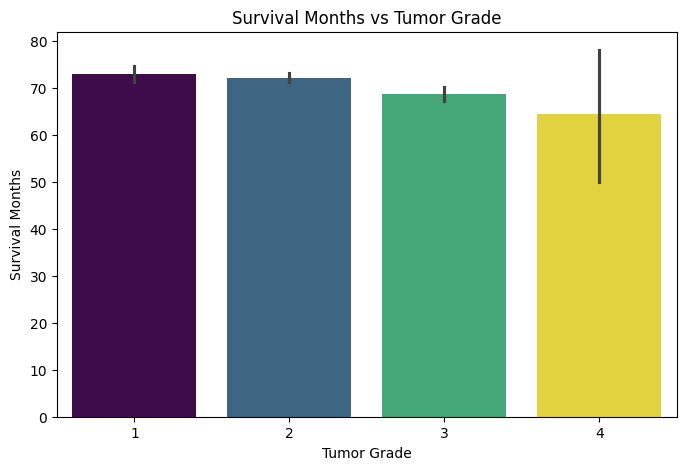

In [ ]:
# Relationship between tumour aggressiveness (grade) and survival months
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Grade"], y=df["Survival Months"], palette="viridis", hue=df["Grade"], legend=False)

plt.xlabel("Tumor Grade")
plt.ylabel("Survival Months")
plt.title("Survival Months vs Tumor Grade")
plt.show()

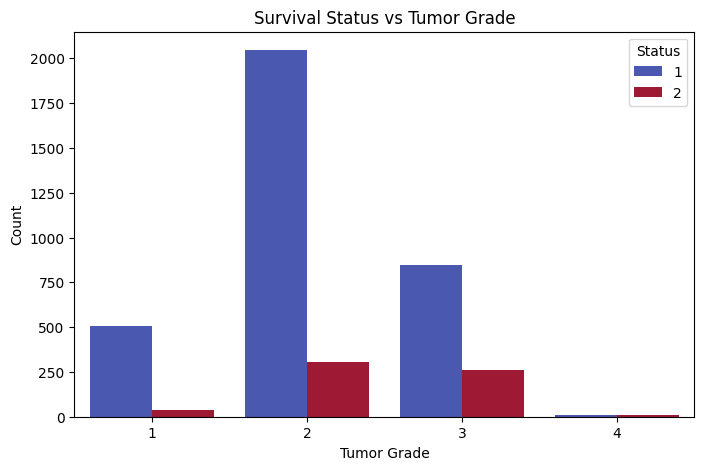

In [ ]:
# Relationship between tumour aggressiveness (grade) and survival status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Grade"], hue=df["Status"], palette="coolwarm")

plt.xlabel("Tumor Grade")
plt.ylabel("Count")
plt.title("Survival Status vs Tumor Grade")
plt.show()

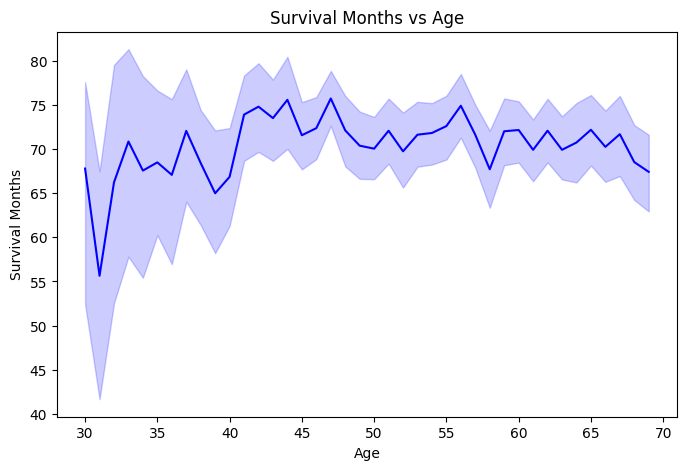

In [ ]:
# Relationship between age and survival months
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["Age"], y=df["Survival Months"], color="blue")

plt.xlabel("Age")
plt.ylabel("Survival Months")
plt.title("Survival Months vs Age")
plt.show()

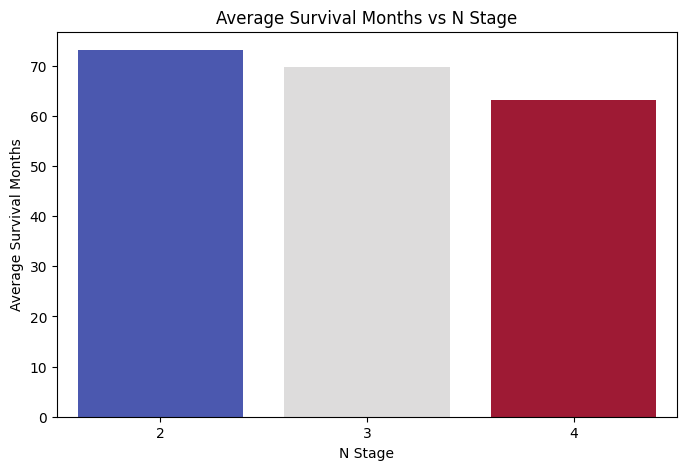

In [ ]:
# Relationship between N stage and survival months
avg_survival_months = df.groupby("N Stage")["Survival Months"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_survival_months.index, y=avg_survival_months.values, palette="coolwarm", hue=avg_survival_months.index, legend=False)

# Set labels and title
plt.xlabel("N Stage")
plt.ylabel("Average Survival Months")
plt.title("Average Survival Months vs N Stage")
plt.show()

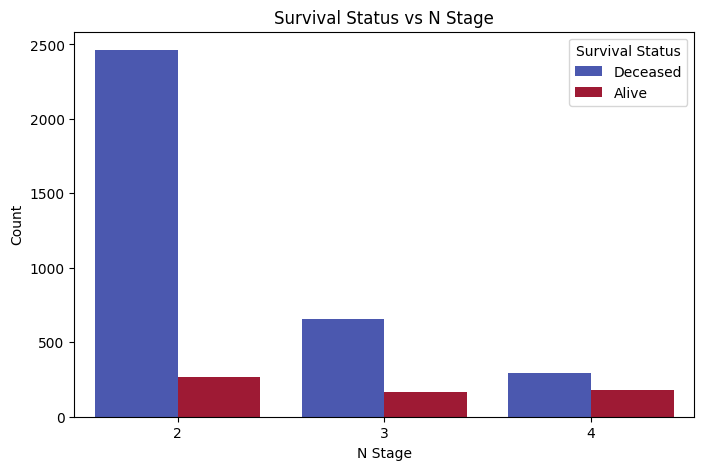

In [ ]:
# Relationship between N stage and survival rate
plt.figure(figsize=(8, 5))
sns.countplot(x=df["N Stage"], hue=df["Status"], palette="coolwarm")

plt.xlabel("N Stage")
plt.ylabel("Count")
plt.title("Survival Status vs N Stage")
plt.legend(title="Survival Status", labels=["Deceased", "Alive"])
plt.show()

2. Other analyses

<Axes: >

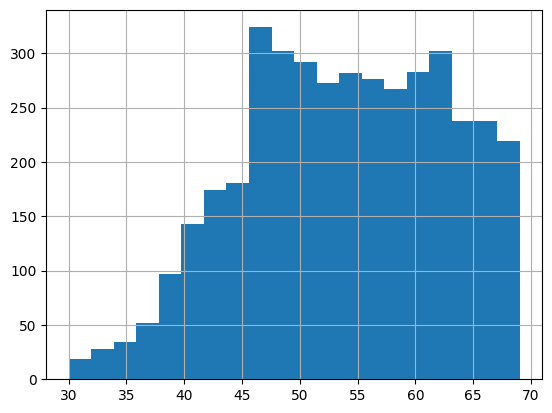

In [ ]:
# Age distribution of breast cancer patients
df["Age"].hist(bins=20)

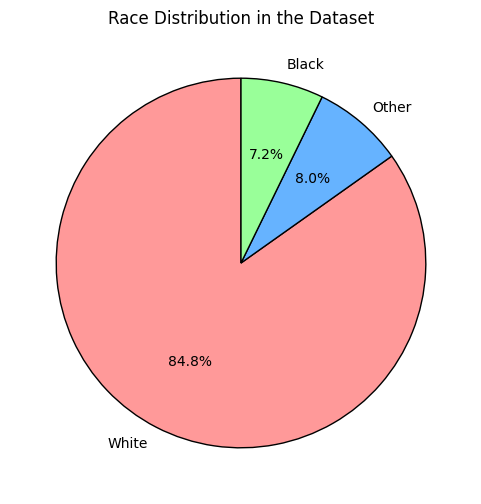

In [ ]:
# Race distribution
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0","#ffb3e6"]

race_lbl_map = {
    1: "White",
    2: "Black",
    3: "Other"
}

# Replace values only for visualization
race_counts = df["Race"].value_counts()
race_labels = [race_lbl_map.get(race, "Unknown") for race in race_counts.index]

# Define custom colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]

plt.figure(figsize=(6, 6))
plt.pie(
    race_counts,
    labels=race_labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Race Distribution in the Dataset")
plt.ylabel("")  # Hide the y-label
plt.show()


In [ ]:
# Marital status vs survival months
df.groupby("Marital Status")["Survival Months"].mean()

,Survival Months
Marital Status,
1,71.979569
2,70.520576
3,69.327660
4,70.422764
5,61.911111


No effect.

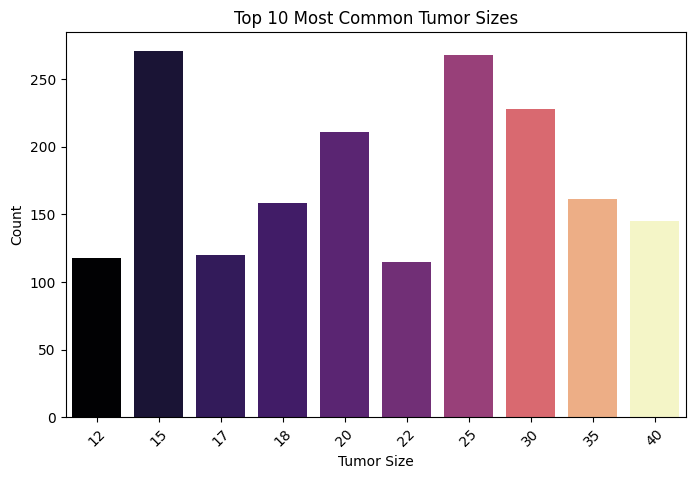

In [ ]:
# Tumour size with top ten most common sizes
tumor_counts = df["Tumor Size"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=tumor_counts.index, y=tumor_counts.values, palette="magma", hue=tumor_counts.index, legend=False)

plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.title("Top 10 Most Common Tumor Sizes")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [ ]:
# Survival rate and 6th stage
df.groupby("6th Stage")["Survival Months"].mean()

,Survival Months
6th Stage,
2,73.394251
3,68.085588


In [ ]:
# Hormone receptors and survival rate
df.groupby("Estrogen Status")["Survival Months"].mean()


,Survival Months
Estrogen Status,
1,72.086019
2,60.297398


In [ ]:
df.groupby("Progesterone Status")["Survival Months"].mean()

,Survival Months
Progesterone Status,
1,72.306073
2,66.494269


Weak positive correlation between hormone receptors and survival rate?